In [1]:
import cv2

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

DATA_PATH = "./drive/MyDrive"  # eğer data drive'dan çekilmiyorsa burası değişmeli.

Mounted at /content/drive


In [3]:
video_path = os.path.join(DATA_PATH, "path_to_video.mp4")

In [4]:
# Creates the frames as .jpg files and put them into the output_folder parameter named folder.
# Be aware! When you use the function, Don't use it with another video blatantly.
# I have not yet developed it for such cases.

import os

def video_to_frames(video_path, output_folder):

    # Check if the output folder exists, if not, create it
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    cap = cv2.VideoCapture(video_path)
    count = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        frame_path = f"{output_folder}/frame_{count}.jpg"
        cv2.imwrite(frame_path, frame)
        count += 1
    cap.release()

# Example usage
video_to_frames(video_path, 'frames_output')

In [5]:
# I have the pretrained model in my drive
# So either you get it and upload it to your drive, or wait for another patch from me.

pretrained_model_path = os.path.join(DATA_PATH, "shape_predictor_68_face_landmarks.dat")

In [8]:
# Here if you get the image from your drive you need to adjust this path.
# Or you can put the image to the same directory with the code like me.
# image_path = "frame_0.jpg"  # if the image is in the directory.

image_path = "frames_output/frame_0.jpg"  # if the image is created from the video.


In [9]:
import cv2
import dlib

# Load pre-trained facial landmark detector
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(pretrained_model_path)

def detect_face(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = detector(gray)

    for face in faces:
        landmarks = predictor(gray, face)

        face_points = []
        for n in range(68):
            x = landmarks.part(n).x
            y = landmarks.part(n).y
            face_points.append((x, y))

        return face_points

# Example usage
image = cv2.imread(image_path)
face_landmarks = detect_face(image)


In [10]:
import cv2
import dlib

# Load pre-trained facial landmark detector
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(pretrained_model_path)

def detect_lips(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = detector(gray)

    for face in faces:
        landmarks = predictor(gray, face)

        # Lip landmarks are indexed from 48 to 67 (68-point model)
        lip_points = []
        for n in range(48,68):
            x = landmarks.part(n).x
            y = landmarks.part(n).y
            lip_points.append((x, y))

        return lip_points

# Example usage
image = cv2.imread(image_path)
#image = cv2.imread('frames_output/frame_0.jpg')
lip_landmarks = detect_lips(image)


In [11]:
import cv2
import dlib

# Load pre-trained facial landmark detector
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(pretrained_model_path)

def detect_outer_lips(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = detector(gray)

    for face in faces:
        landmarks = predictor(gray, face)

        # Lip landmarks are indexed from 48 to 59 (68-point model)
        lip_points = []
        for n in range(48,60):
            x = landmarks.part(n).x
            y = landmarks.part(n).y
            lip_points.append((x, y))

        return lip_points

# Example usage
image = cv2.imread(image_path)
#image = cv2.imread('frames_output/frame_0.jpg')
outer_lip_landmarks = detect_outer_lips(image)


In [12]:
# Crops the face from the image using the face_landmarks you get from the functions above.
# And creates a jpg image in the directory. So that you can download it and check out the image.
# I will make a patch for testing purposes for videos. It will omit inefficiencies like this.
def crop_face(image, face_landmarks):
    # Get bounding box for the lips
    x_min = min([point[0] for point in face_landmarks])
    y_min = min([point[1] for point in face_landmarks])
    x_max = max([point[0] for point in face_landmarks])
    y_max = max([point[1] for point in face_landmarks])

    # Crop the face region
    face_region = image[y_min:y_max, x_min:x_max]
    return face_region

# Example usage
face_region = crop_face(image, face_landmarks)
cv2.imwrite('face_region.jpg', face_region)

True

In [13]:
def crop_lips(image, lip_landmarks):
    # Get bounding box for the lips
    x_min = min([point[0] for point in lip_landmarks])
    y_min = min([point[1] for point in lip_landmarks])
    x_max = max([point[0] for point in lip_landmarks])
    y_max = max([point[1] for point in lip_landmarks])

    # Crop the lip region
    lip_region = image[y_min:y_max, x_min:x_max]
    return lip_region

# Example usage
lip_region = crop_lips(image, lip_landmarks)
cv2.imwrite('lip_region.jpg', lip_region)

True

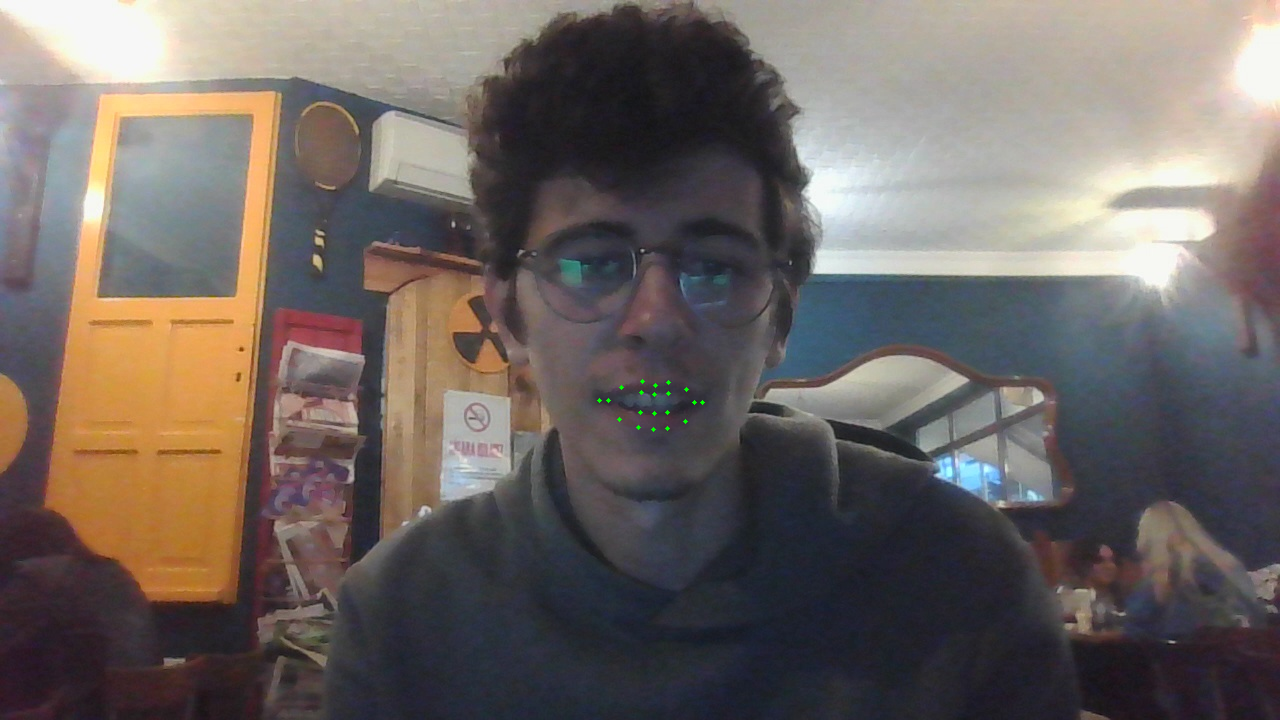

In [14]:
import cv2
import dlib
from google.colab.patches import cv2_imshow  # Import this for image display in Colab

# Load pre-trained facial landmark detector
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(pretrained_model_path)  # Ensure this is the correct path

def detect_lips(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = detector(gray)

    for face in faces:
        landmarks = predictor(gray, face)

        # Create a list to store the lip landmarks
        lip_points = []
        for n in range(48,68):  # You are now extracting all 68 points
            x = landmarks.part(n).x
            y = landmarks.part(n).y
            lip_points.append((x, y))
            # Draw a circle at each landmark point
            cv2.circle(image, (x, y), 2, (0, 255, 0), -1)  # Green dots on the landmark points

        return lip_points, image  # Return both landmarks and image with landmarks drawn

# Example usage
image = cv2.imread(image_path)  # Load your image

#image = cv2.imread('frames_output/frame_0.jpg')  # Load your image
lip_landmarks, image_with_landmarks = detect_lips(image)

# Display the image with landmarks in Colab
cv2_imshow(image_with_landmarks)


In [15]:
print(len(face_landmarks), face_landmarks)
# There are 68 landmark on the face in total. 20 of them are on the mouth and 12 of the 20 are on the outer lips.

68 [(513, 278), (516, 315), (521, 351), (526, 387), (536, 421), (556, 449), (582, 471), (613, 490), (649, 495), (683, 490), (712, 472), (734, 448), (750, 418), (758, 385), (764, 351), (770, 317), (773, 284), (543, 250), (560, 229), (586, 220), (614, 220), (639, 229), (673, 229), (696, 220), (722, 220), (745, 230), (757, 250), (655, 258), (657, 281), (658, 303), (660, 326), (627, 347), (641, 351), (656, 356), (670, 353), (683, 349), (571, 266), (586, 258), (604, 258), (619, 268), (603, 271), (586, 271), (685, 270), (702, 260), (719, 261), (732, 270), (719, 273), (702, 273), (599, 400), (621, 387), (642, 381), (655, 385), (668, 382), (686, 389), (702, 402), (685, 421), (667, 428), (653, 429), (638, 427), (619, 419), (608, 400), (641, 392), (654, 394), (668, 393), (694, 402), (667, 412), (654, 413), (640, 412)]


In [17]:
# Calculates the aspect ratio. I think it is a nice indicator and should be in the solution formula.
# If the value is greater, the "probability" of roundedness is higher.

def lip_features(lip_landmarks):
    # Convert tuples to NumPy arrays for vector operations
    top_lip = np.mean(lip_landmarks[50:53], axis=0)  # Upper middle lip
    bottom_lip = np.mean(lip_landmarks[56:59], axis=0)  # Lower middle lip
    left_corner = np.array(lip_landmarks[48])  # Left corner of the mouth
    right_corner = np.array(lip_landmarks[54])  # Right corner of the mouth

    # Calculate vertical and horizontal distances
    vertical_dist = np.linalg.norm(top_lip - bottom_lip)
    horizontal_dist = np.linalg.norm(left_corner - right_corner)

    # Calculate lip aspect ratio
    lip_aspect_ratio = vertical_dist / horizontal_dist

    return lip_aspect_ratio

# Example usage
lip_aspect_ratio = lip_features(face_landmarks)

if lip_aspect_ratio is not None:
    print(f"Lip Aspect Ratio: {lip_aspect_ratio}")


#left corner:48,
#upper outer: [49:54],
#right corner: 54,
#lower outer: [55:60],
#inner left corner: 60,
#upper inner: [61:64],
#inner right corner: 64,
#lower inner: [65:68]

Lip Aspect Ratio: 0.4406290052238547


## Try to create a Kernel as a Filter

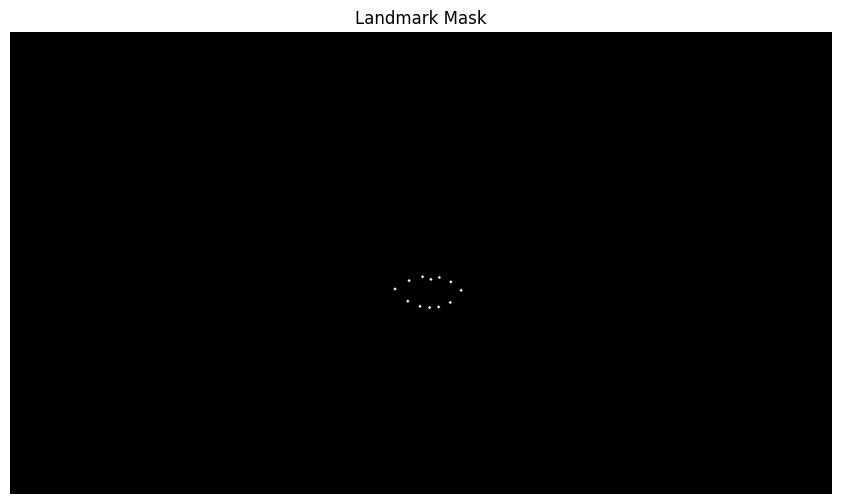

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def apply_kernel(image, kernel):
    """
    Apply the given convolution kernel to an image.

    Parameters:
        image (numpy.ndarray): The input image to which the kernel is applied.
        kernel (numpy.ndarray): The convolution kernel.

    Returns:
        numpy.ndarray: The convolved image.
    """
    # Apply the kernel to the image using the cv2.filter2D function
    convolved = cv2.filter2D(image, -1, kernel)
    return convolved


def create_landmark_mask(image_shape, landmarks):
    # Create an empty mask
    mask = np.zeros(image_shape[:2], dtype=np.uint8)

    # Mark the landmark points on the mask
    for (x, y) in landmarks:
        cv2.circle(mask, (x, y), radius=2, color=255, thickness=-1)

    return mask

# Example usage
landmark_mask = create_landmark_mask(image.shape, outer_lip_landmarks)

# Display the original mask and the convolved result
plt.figure(figsize=(12, 6))
plt.imshow(landmark_mask, cmap='gray')
plt.title('Landmark Mask')
plt.axis('off')
plt.show()


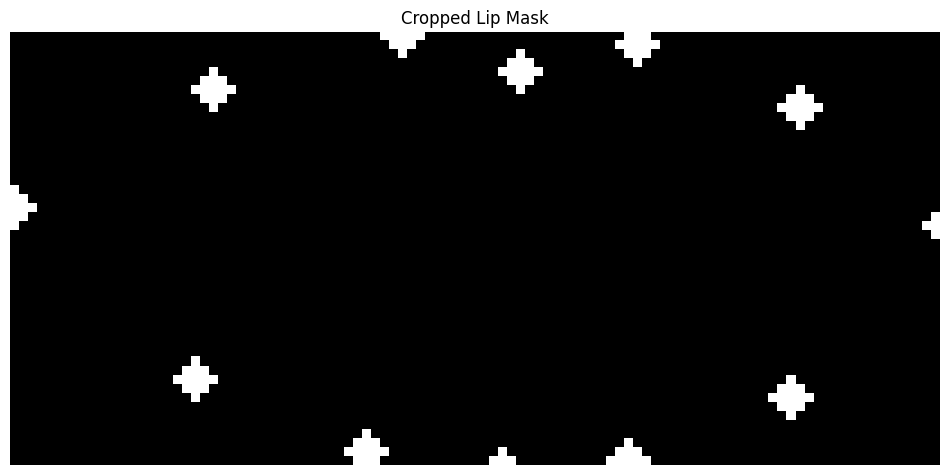

In [ ]:
def crop_lip_region(image, landmarks):
    """
    Crop the region around the lip based on the landmarks.

    Parameters:
        image (numpy.ndarray): The original image.
        landmarks (list of tuples): The list of landmark points.

    Returns:
        numpy.ndarray: The cropped lip region.
        tuple: The coordinates of the top-left corner of the cropped region (x_min, y_min).
    """
    # Get the bounding box for the lip landmarks
    x_min = min([point[0] for point in landmarks])
    y_min = min([point[1] for point in landmarks])
    x_max = max([point[0] for point in landmarks])
    y_max = max([point[1] for point in landmarks])

    # Crop the lip region from the image
    cropped_lip = image[y_min:y_max, x_min:x_max]

    return cropped_lip, (x_min, y_min)

# Crop the lip region from the landmark mask
cropped_lip_mask, (x_min, y_min) = crop_lip_region(landmark_mask, outer_lip_landmarks)


# Display the cropped lip region and the convolved result
plt.figure(figsize=(12, 6))
plt.imshow(cropped_lip_mask, cmap='gray')
plt.title('Cropped Lip Mask')
plt.axis('off')
plt.show()


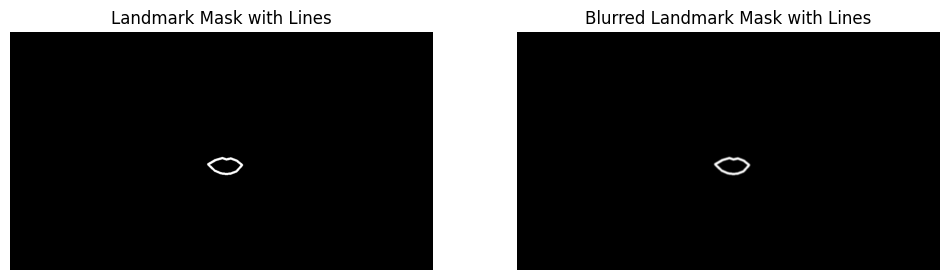

In [ ]:
def create_landmark_mask_with_lines(image_shape, landmarks, radius=5, is_closed=True):
    """
    Create a mask for the given landmarks, drawing lines between them.

    Parameters:
        image_shape (tuple): The shape of the original image.
        landmarks (list of tuples): The list of landmark points.
        radius (int): Radius of the points for visualization.
        is_closed (bool): Whether to close the contour.

    Returns:
        numpy.ndarray: The mask with lines connecting the landmark points.
    """
    # Create an empty mask
    mask = np.zeros(image_shape[:2], dtype=np.uint8)

    # Convert landmarks to a format suitable for drawing polylines
    points = np.array(landmarks, np.int32).reshape((-1, 1, 2))

    # Draw lines connecting the landmarks
    cv2.polylines(mask, [points], isClosed=is_closed, color=255, thickness=radius)

    return mask

# Example usage
landmark_mask_with_lines = create_landmark_mask_with_lines(image.shape, outer_lip_landmarks, radius=5)

# Optionally, apply Gaussian blur to smooth the mask
blurred_mask_with_lines = cv2.GaussianBlur(landmark_mask_with_lines, (5, 5), sigmaX=2)

# Display the mask with lines and the blurred version
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(landmark_mask_with_lines, cmap='gray')
plt.title('Landmark Mask with Lines')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(blurred_mask_with_lines, cmap='gray')
plt.title('Blurred Landmark Mask with Lines')
plt.axis('off')

plt.show()


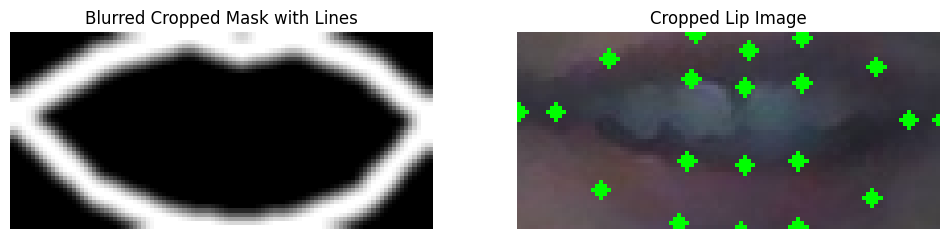

In [ ]:
def crop_and_create_landmark_mask(image, landmarks, radius=5, is_closed=True):
    """
    Crop the region around the lip based on the landmarks and create a mask with lines.

    Parameters:
        image (numpy.ndarray): The original image.
        landmarks (list of tuples): The list of landmark points.
        radius (int): Radius of the points for visualization.
        is_closed (bool): Whether to close the contour.

    Returns:
        numpy.ndarray: The cropped lip region mask with lines connecting the landmark points.
        numpy.ndarray: The cropped original image of the lip region.
    """
    # Get the bounding box for the lip landmarks
    x_min = min([point[0] for point in landmarks])
    y_min = min([point[1] for point in landmarks])
    x_max = max([point[0] for point in landmarks])
    y_max = max([point[1] for point in landmarks])

    # Crop the lip region from the original image
    cropped_image = image[y_min:y_max, x_min:x_max]

    # Create an empty mask with the shape of the cropped region
    cropped_mask = np.zeros((y_max - y_min, x_max - x_min), dtype=np.uint8)

    # Adjust landmarks to the cropped region
    adjusted_landmarks = [(x - x_min, y - y_min) for (x, y) in landmarks]

    # Convert adjusted landmarks to a format suitable for drawing polylines
    points = np.array(adjusted_landmarks, np.int32).reshape((-1, 1, 2))

    # Draw lines connecting the landmarks
    cv2.polylines(cropped_mask, [points], isClosed=is_closed, color=255, thickness=radius)

    return cropped_mask, cropped_image

# Example usage
cropped_mask_with_lines, cropped_lip_image = crop_and_create_landmark_mask(image, outer_lip_landmarks, radius=5)

# Optionally, apply Gaussian blur to smooth the mask
blurred_cropped_mask_with_lines = cv2.GaussianBlur(cropped_mask_with_lines, (5, 5), sigmaX=2)

# Display the cropped mask with lines and the original cropped image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(blurred_cropped_mask_with_lines, cmap='gray')
plt.title('Blurred Cropped Mask with Lines')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(cropped_lip_image, cv2.COLOR_BGR2RGB))
plt.title('Cropped Lip Image')
plt.axis('off')

plt.show()


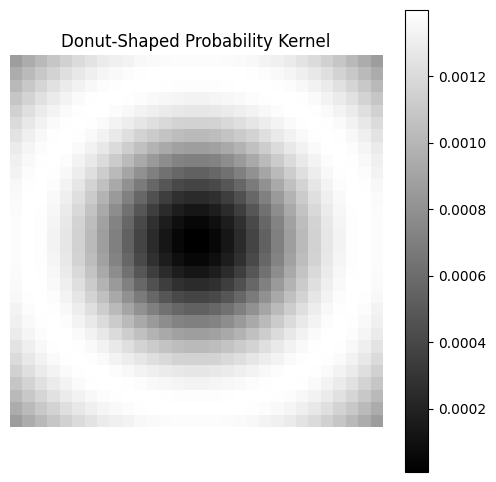

In [ ]:
# This is the main part of the solution technique. Basically a kernel to filter the mouth shape to determine if it is rounded shape.
# By playing with the parameters, the filter can be adjusted.
def create_donut_shaped_kernel(size, sigma_outer, sigma_inner):
    """
    Create a donut-shaped kernel with a Gaussian profile.

    Parameters:
        size (int): The diameter of the kernel.
        sigma_outer (float): The standard deviation of the outer Gaussian.
        sigma_inner (float): The standard deviation of the inner Gaussian.

    Returns:
        numpy.ndarray: The donut-shaped kernel.
    """
    # Create a 2D Gaussian for the outer ring
    x = np.linspace(-size // 2, size // 2, size)
    y = np.linspace(-size // 2, size // 2, size)
    x, y = np.meshgrid(x, y)
    gaussian_outer = np.exp(-(x**2 + y**2) / (2 * sigma_outer**2))

    # Create a 2D Gaussian for the inner subtraction
    gaussian_inner = np.exp(-(x**2 + y**2) / (2 * sigma_inner**2))

    # Subtract the inner Gaussian from the outer Gaussian to create a donut shape
    donut_kernel = gaussian_outer - gaussian_inner

    # Normalize the kernel to make the sum equal to 1 (probability distribution)
    donut_kernel /= np.sum(np.abs(donut_kernel))

    return donut_kernel

# Example usage
donut_kernel = create_donut_shaped_kernel(size=30, sigma_outer=10, sigma_inner=9.7)

# Display the donut-shaped kernel
plt.figure(figsize=(6, 6))
plt.imshow(donut_kernel, cmap='gray')
plt.title('Donut-Shaped Probability Kernel')
plt.colorbar()
plt.axis('off')
plt.show()


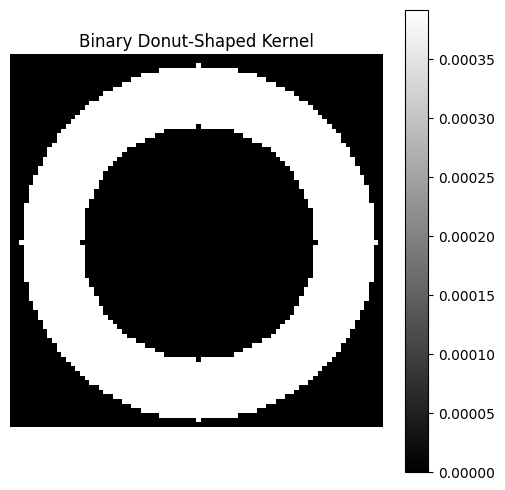

In [ ]:
def create_binary_donut_kernel(size, outer_radius, inner_radius):
    """
    Create a binary donut-shaped kernel.

    Parameters:
        size (int): The diameter of the kernel.
        outer_radius (float): The radius of the outer circle.
        inner_radius (float): The radius of the inner circle to be subtracted.

    Returns:
        numpy.ndarray: The binary donut-shaped kernel.
    """
    # Create an empty kernel
    kernel = np.zeros((size, size), dtype=np.float32)
    center = size // 2

    # Create the outer circular mask
    for i in range(size):
        for j in range(size):
            if (i - center)**2 + (j - center)**2 <= outer_radius**2:
                kernel[i, j] = 1

    # Subtract the inner circular mask
    for i in range(size):
        for j in range(size):
            if (i - center)**2 + (j - center)**2 <= inner_radius**2:
                kernel[i, j] = 0

    # Normalize the kernel
    kernel /= np.sum(kernel)

    return kernel

# Example usage for a binary donut
binary_donut_kernel = create_binary_donut_kernel(size=80, outer_radius=38, inner_radius=25)

# Display the binary donut-shaped kernel
plt.figure(figsize=(6, 6))
plt.imshow(binary_donut_kernel, cmap='gray')
plt.title('Binary Donut-Shaped Kernel')
plt.colorbar()
plt.axis('off')
plt.show()


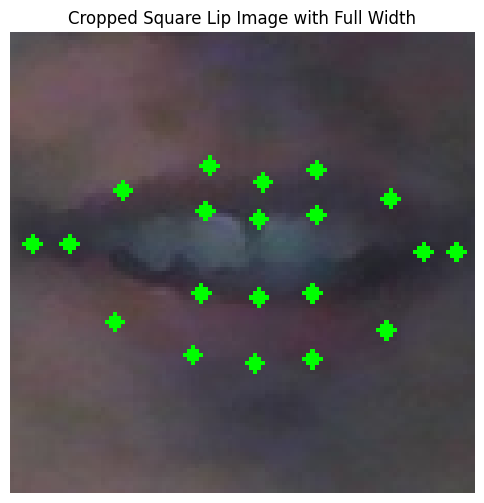

In [ ]:
def crop_lip_to_square_with_full_width(image, landmarks, padding=0):
    """
    Crop the region around the lip based on the landmarks, keeping the full width,
    and adjusting the height to make the crop square.

    Parameters:
        image (numpy.ndarray): The original image.
        landmarks (list of tuples): The list of landmark points.
        padding (int): Additional padding to add around the cropped region.

    Returns:
        numpy.ndarray: The cropped square lip region.
    """
    # Get the bounding box for the lip landmarks
    x_min = min([point[0] for point in landmarks]) - padding
    y_min = min([point[1] for point in landmarks]) - padding
    x_max = max([point[0] for point in landmarks]) + padding
    y_max = max([point[1] for point in landmarks]) + padding

    # Ensure the coordinates are within image boundaries
    x_min = max(x_min, 0)
    y_min = max(y_min, 0)
    x_max = min(x_max, image.shape[1])
    y_max = min(y_max, image.shape[0])

    # Calculate the width and height of the cropped region
    width = x_max - x_min
    height = y_max - y_min

    # Make the cropped region square by expanding the height
    if width > height:
        # Calculate the additional height needed to make it square
        diff = (width - height) // 2
        y_min = max(y_min - diff, 0)
        y_max = min(y_max + diff, image.shape[0])

    # Crop the square region from the original image
    cropped_square = image[y_min:y_max, x_min:x_max]

    return cropped_square

# Example usage
cropped_square_lip_with_full_width = crop_lip_to_square_with_full_width(image, outer_lip_landmarks, padding=5)

# Display the cropped square lip with full width
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(cropped_square_lip_with_full_width, cv2.COLOR_BGR2RGB))
plt.title('Cropped Square Lip Image with Full Width')
plt.axis('off')
plt.show()


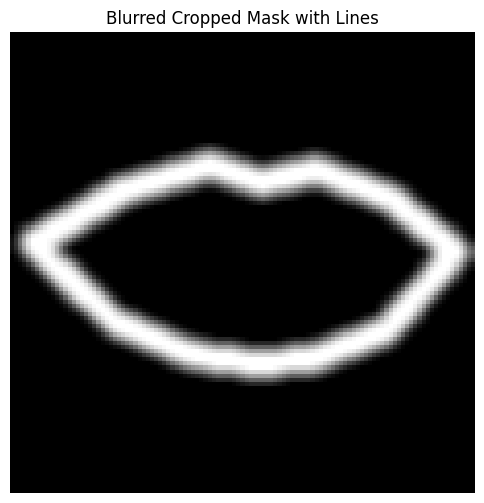

In [ ]:
def create_landmark_mask_with_lines(image_shape, landmarks, radius=5, is_closed=True):
    """
    Create a mask for the given landmarks, drawing lines between them.

    Parameters:
        image_shape (tuple): The shape of the original image.
        landmarks (list of tuples): The list of landmark points.
        radius (int): Radius of the points for visualization.
        is_closed (bool): Whether to close the contour.

    Returns:
        numpy.ndarray: The mask with lines connecting the landmark points.
    """
    # Create an empty mask
    mask = np.zeros(image_shape[:2], dtype=np.uint8)

    # Convert landmarks to a format suitable for drawing polylines
    points = np.array(landmarks, np.int32).reshape((-1, 1, 2))

    # Draw lines connecting the landmarks
    cv2.polylines(mask, [points], isClosed=is_closed, color=255, thickness=radius)

    return mask

def crop_mask_to_square_with_full_width(mask, landmarks, padding=0):
    """
    Crop the mask to a square region with the full width, adjusted to include the mouth.

    Parameters:
        mask (numpy.ndarray): The mask with lines.
        landmarks (list of tuples): The list of landmark points.
        padding (int): Additional padding to add around the cropped region.

    Returns:
        numpy.ndarray: The cropped square mask.
    """
    # Use the same cropping logic as the function to crop the image
    return crop_lip_to_square_with_full_width(mask, landmarks, padding)

# Create the initial landmark mask with lines
landmark_mask_with_lines = create_landmark_mask_with_lines(image.shape, outer_lip_landmarks, radius=5)

# Crop the mask to a square region
cropped_mask_with_lines = crop_mask_to_square_with_full_width(landmark_mask_with_lines, outer_lip_landmarks, padding=5)

# Apply Gaussian blur to the cropped mask
blurred_cropped_mask_with_lines = cv2.GaussianBlur(cropped_mask_with_lines, (5, 5), sigmaX=2)

# Display the blurred mask
plt.figure(figsize=(6, 6))
plt.imshow(blurred_cropped_mask_with_lines, cmap='gray')
plt.title('Blurred Cropped Mask with Lines')
plt.axis('off')
plt.show()


In [ ]:
def resize_kernel_to_match(masked_image, filter_kernel):
    """
    Resize the filter kernel to match the dimensions of the masked image.

    Parameters:
        masked_image (numpy.ndarray): The masked lip image.
        filter_kernel (numpy.ndarray): The filter kernel to be resized.

    Returns:
        numpy.ndarray: The resized filter kernel.
    """
    # Resize the filter kernel to match the shape of the masked image
    resized_kernel = cv2.resize(filter_kernel, (masked_image.shape[1], masked_image.shape[0]), interpolation=cv2.INTER_AREA)
    return resized_kernel

def calculate_dot_product_probability(masked_image, filter_kernel):
    """
    Calculate the dot product probability between the masked image and the filter.

    Parameters:
        masked_image (numpy.ndarray): The normalized masked lip image.
        filter_kernel (numpy.ndarray): The normalized filter kernel.

    Returns:
        float: The dot product similarity as a probability.
    """
    # Resize the kernel to match the shape of the masked image
    resized_kernel = resize_kernel_to_match(masked_image, filter_kernel)

    # Normalize the masked image and the filter
    masked_image_norm = masked_image / np.max(masked_image)
    resized_kernel_norm = resized_kernel / np.max(resized_kernel)

    # Flatten both arrays
    masked_image_flat = masked_image_norm.flatten()
    resized_kernel_flat = resized_kernel_norm.flatten()

    # Calculate the dot product
    dot_product = np.dot(masked_image_flat, resized_kernel_flat)

    # Normalize the result to get a probability (values between 0 and 1)
    probability = dot_product / (np.linalg.norm(masked_image_flat) * np.linalg.norm(resized_kernel_flat))

    return probability

# Example usage
probability_of_round_lip = calculate_dot_product_probability(blurred_cropped_mask_with_lines, binary_donut_kernel)

print(f"Probability of a round lip shape: {probability_of_round_lip:.2f}")


# here, instead of binary_donut_kernel, donut_kernel can be used, but, it is not yet perfected and maybe it will not be perfect ever.
# I think solution should include aspect ratio value. There is a function calculating above.

Probability of a round lip shape: 0.36


In [ ]:
# After this scoring part, we should normalize the values as the values are not between 0 and 1, but rather are between 0.20,0.80.
# We need to map the values into 0 and 1.
# It will not be a "probability" per se. It will be the score of the technique.